In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/huggingface/transformers.git@main

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-l6ll6enl
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-l6ll6enl
  Resolved https://github.com/huggingface/transformers.git to commit 41c5f45bfe958be58bac6c891652f632ebac23e2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
from PIL import Image
import os
import glob
from PIL import Image
from collections import Counter
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration
import pickle

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [5]:
def load_model(model_type):
  model_file_path = '/content/drive/MyDrive/Colab Notebooks/model/trained_model_'+ model_type +'.pkl'
  with open(model_file_path, 'rb') as file:
      model = pickle.load(file)
  return model

In [6]:
crazy_model = load_model(model_type = 'Crazy')
hateful_model = load_model(model_type = 'Hateful')
serious_model = load_model(model_type = 'Serious')
romantic_model = load_model(model_type = 'Romantic')
sweet_model = load_model(model_type = 'Sweet')
dramatic_model = load_model(model_type = 'Dramatic')
normal_model = load_model(model_type = 'Normal')


In [7]:
def type_text_generation(image, type_list):
  ans = []
  processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
  inputs = processor(images=image, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values
  for t in type_list:
    if t.lower() == 'crazy':
      model = crazy_model
    elif t.lower() == 'hateful':
      model = hateful_model
    elif t.lower() == 'serious':
      model = serious_model
    elif t.lower() == 'romantic':
      model = romantic_model
    elif t.lower() == 'sweet':
      model = sweet_model
    elif t.lower() == 'dramatic':
      model = dramatic_model
    elif t.lower() == 'normal':
      model = normal_model
    generated_ids = model.generate(pixel_values=pixel_values, max_length=100)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    content = t + ' : ' + generated_caption
    ans.append(content)
    del model, generated_ids, generated_caption, content
  return ans

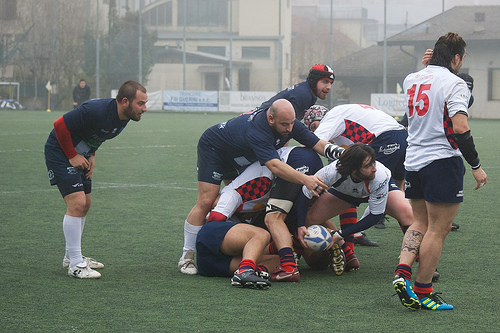

In [10]:
# image_file = '/content/drive/MyDrive/Colab Notebooks/Flickr_8k_Dataset/Cat03.jpg'
# image_file = '/content/drive/MyDrive/Colab Notebooks/Flickr_8k_Dataset/iStock.jpg'
# image_file = '/content/drive/MyDrive/Colab Notebooks/parAI/fakesmile.jpg'
# image_file = '/content/drive/MyDrive/Colab Notebooks/Flickr_8k_Dataset/101.jpg'
# image_file = '/content/drive/MyDrive/Colab Notebooks/Flickr_8k_Dataset/3726025663_e7d35d23f6.jpg'
image_file = '/content/drive/MyDrive/Colab Notebooks/parAI/e3ddc761c69244d2c6a774b4626282c5.jpg'
image = Image.open(image_file)
image


In [12]:
type_list = ['normal', 'crazy','romantic','serious','sweet','hateful', 'dramatic']
# content = type_text_generation(image_file, type_list)
content = type_text_generation(image, type_list)

for i in content:
  print(i)

normal : a group of people are playing a game of soccer on a field.
crazy : what if i get caught by a bum bum bum bum bum bum bum bum bum bum bum bum bum bum bum bum bum bum bum bum
romantic : i would love to go on a date with my partner.
serious : these players are competing at a high level.
sweet : the guys are so handsome and kind.
hateful : i don't like how they are sitting on the ground.
dramatic : oh my i cant believe they lost the ball!
